In [138]:
import pandas as pd
import numpy as np
import time

In [69]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [70]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [71]:
# No null/missing values

In [72]:
# goal is to predict trip duration accurately 
# as trip duration variable is continuous variable we use regression

In [73]:
data.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.286463,0.008198,0.002861,0.002371,0.005259,0.027752
passenger_count,0.286463,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022
pickup_longitude,0.008198,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447
pickup_latitude,0.002861,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163
dropoff_longitude,0.002371,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664
dropoff_latitude,0.005259,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283
trip_duration,0.027752,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000


In [74]:
data.shape

(729322, 11)

In [75]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [76]:
# converting datetime object data type to date data type

In [77]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])



In [78]:
data['pickup_hour'] = data.pickup_datetime.dt.hour
data['dropoff_hour'] = data.dropoff_datetime.dt.hour

data['pickup_day'] = data.pickup_datetime.dt.day_name()
data['dropoff_day'] = data.dropoff_datetime.dt.day_name()

data['pickup_day_no'] = data.pickup_datetime.dt.weekday
data['dropoff_day_no'] = data.dropoff_datetime.dt.weekday

data['pickup_month'] = data.pickup_datetime.dt.month
data['dropoff_month'] = data.dropoff_datetime.dt.month





In [79]:
#!pip install geopy

In [80]:
from geopy.distance import geodesic
from IPython.display import clear_output 

In [81]:
'''distance = []
for i in data['pickup_latitude'].index:
    clear_output()
    print(i)
    distance.append(geodesic(  (data['pickup_latitude'].iloc[i],data['pickup_longitude'].iloc[i]) , 
                               (data['dropoff_latitude'].iloc[i],data['dropoff_longitude'].iloc[i])
    ))
data['distance'] = distance
'''



"distance = []\nfor i in data['pickup_latitude'].index:\n    clear_output()\n    print(i)\n    distance.append(geodesic(  (data['pickup_latitude'].iloc[i],data['pickup_longitude'].iloc[i]) , \n                               (data['dropoff_latitude'].iloc[i],data['dropoff_longitude'].iloc[i])\n    ))\ndata['distance'] = distance\n"

In [90]:
## calculating distance is taking lot of time using geodesic because of cpu and ram limitation so we have used great_circle

In [83]:
from geopy.distance import great_circle
def dist(pickup_lat,pickup_long,dropoff_lat,dropoff_log):
    start_coordinates = (pickup_lat,pickup_long)
    stop_coordinates = (dropoff_lat,dropoff_log)
    
    return great_circle(start_coordinates,stop_coordinates).km


In [88]:
data['distance'] = data.apply(lambda x: dist(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'] 
                                            , x['dropoff_longitude']),axis=1)

In [125]:
data['speed'] = (data.distance/(data.trip_duration/3600))

In [126]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_month,dropoff_month,distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,16,16,Monday,Monday,0,0,2,2,1.199074,10.791669
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,23,23,Friday,Friday,4,4,3,3,4.129117,13.513473
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,17,18,Sunday,Sunday,6,6,2,2,7.250763,15.964983
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,9,10,Tuesday,Tuesday,1,1,1,1,2.361101,7.449573
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,6,6,Wednesday,Wednesday,2,2,2,2,4.328540,18.375877


In [91]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour,pickup_day_no,dropoff_day_no,pickup_month,dropoff_month,distance
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.00000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,13.611698,13.60616,3.049081,3.053015,3.518410,3.518764,3.441144
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,6.402853,6.48637,1.954470,1.956866,1.680661,1.680815,4.353138
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,9.000000,9.00000,1.000000,1.000000,2.000000,2.000000,1.232697
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,14.000000,14.00000,3.000000,3.000000,4.000000,4.000000,2.095675
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,19.000000,19.00000,5.000000,5.000000,5.000000,5.000000,3.876487
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,23.000000,23.00000,6.000000,6.000000,6.000000,7.000000,1240.910430


In [19]:
# observations

# only two vendors 1 and 2
# min passanger 0 and max 9 , in one taxi we can't fit 9 passengers , it can be an error value
# min trip duration 1.000000e+00	 can't be possible

In [20]:
## EDA 

In [21]:
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

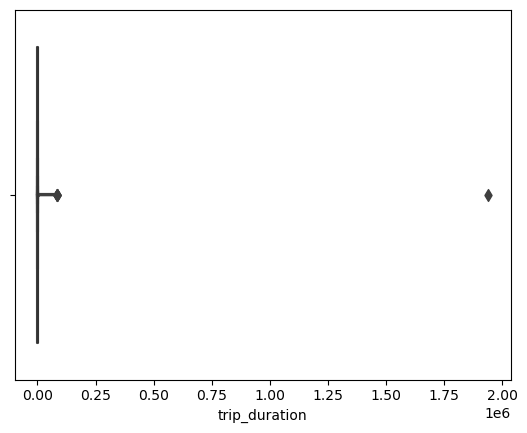

In [23]:
sns.boxenplot(data['trip_duration'])

In [24]:
## from above boxplot we are unable to see median and quartile values properly it means we have outlier in trip_duration column

In [27]:
data['trip_duration'].sort_values()

296874          1
323299          1
622664          1
398887          1
312992          1
           ...   
496391      86377
177225      86378
119185      86387
259437      86391
21813     1939736
Name: trip_duration, Length: 729322, dtype: int64

In [92]:
data.loc[data.trip_duration==1939736]
# a person can't travel continuously in taxi for 22 days so we can delete it

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_month,dropoff_month,distance
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,1939736,0,11,Tuesday,Wednesday,1,2,1,1,20.148692


In [93]:
data.drop( data.loc[data.trip_duration==1939736].index ,inplace = True )

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

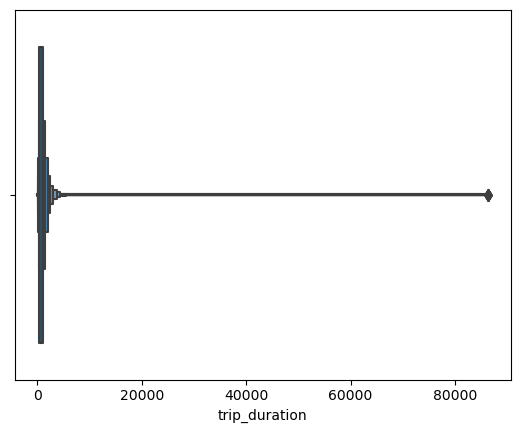

In [94]:
sns.boxenplot(data['trip_duration'])

In [95]:
data['passenger_count'].value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [96]:
## single passengers travels a lot 

In [97]:
data= data.loc[data['passenger_count']<=6]

In [98]:
data= data.loc[data['passenger_count']!=0]

In [99]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [100]:
## trips per day

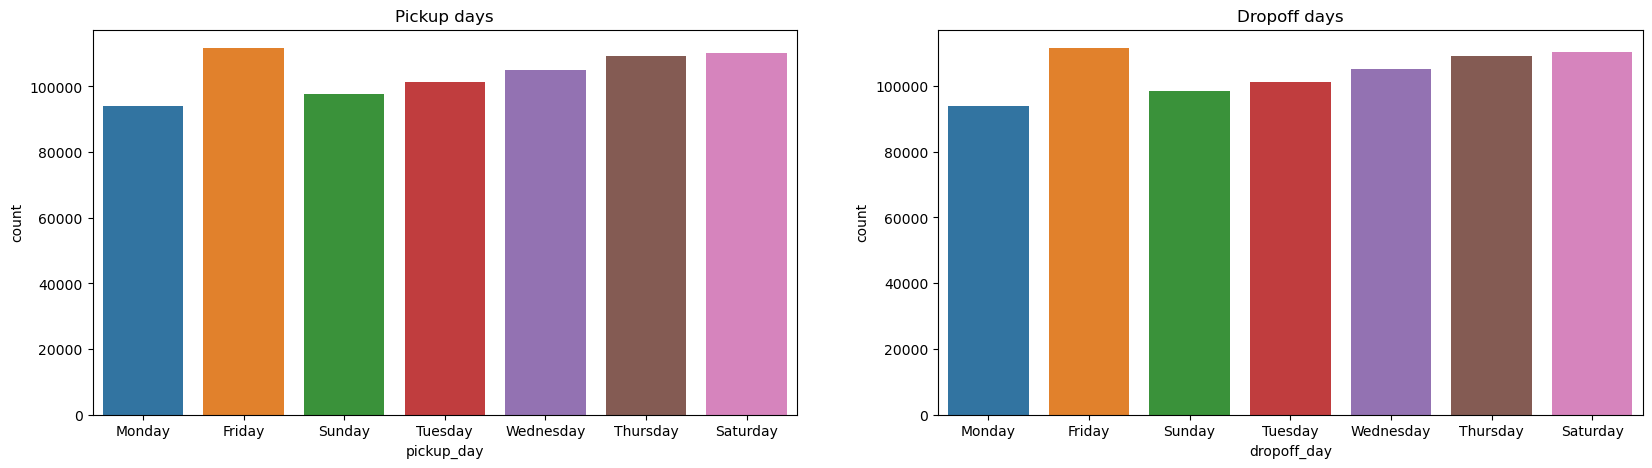

In [101]:
import matplotlib.pyplot as plt
figure,(ax1,ax2) = plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup days')
ax1= sns.countplot(x='pickup_day',data =data,ax=ax1)
ax2.set_title('Dropoff days')
ax2= sns.countplot(x='dropoff_day',data =data,ax=ax2)

In [102]:
# friday is busiest day

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

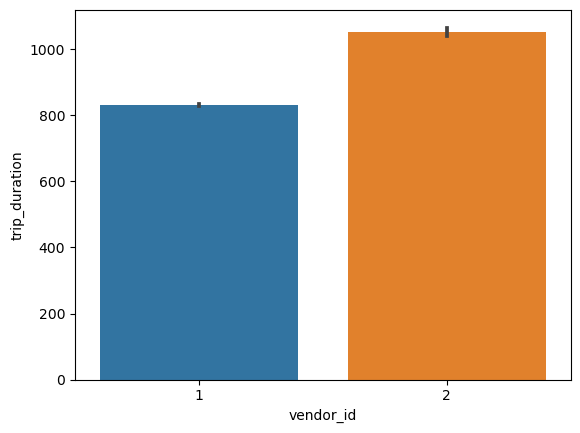

In [103]:
sns.barplot(x='vendor_id',y='trip_duration',data=data,estimator=np.mean)

In [104]:
# vendor2 have high trip duration as compared to vendor1 , vendor2 is earning more

<AxesSubplot:xlabel='pickup_day_no', ylabel='trip_duration'>

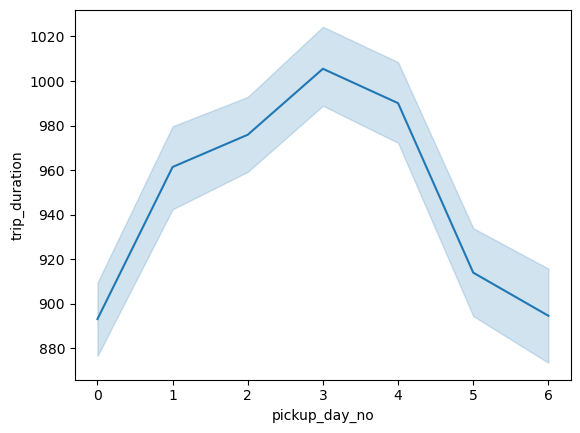

In [105]:
sns.lineplot(data=data,x='pickup_day_no',y='trip_duration')

In [106]:
## trip duration is highest on thursday , it can be because of traffic jam or people travel long distance on thurday

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

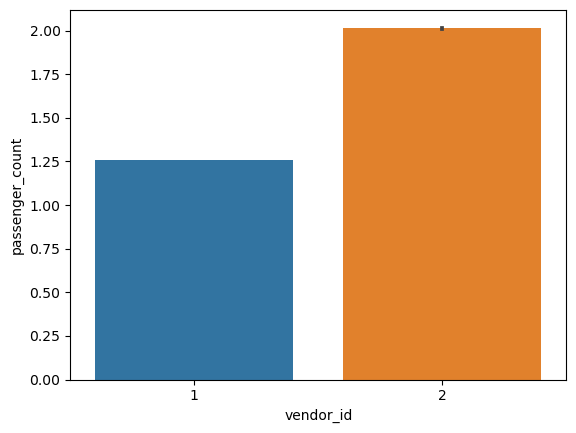

In [107]:
sns.barplot(data=data,x='vendor_id',y='passenger_count')

In [63]:
# vendor2 carries 2 passengers and vendor1 carry 1 

<AxesSubplot:xlabel='pickup_month', ylabel='distance'>

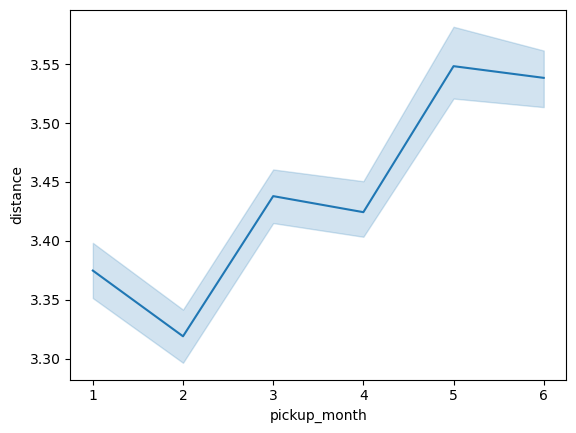

In [108]:
sns.lineplot(x='pickup_month',y='distance',data=data)

In [64]:
# lowest pickup in feb and highest in june

## Model ( using linear regression and decision tree)

In [110]:
from sklearn.model_selection import train_test_split

In [128]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_month,dropoff_month,distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,16,16,Monday,Monday,0,0,2,2,1.199074,10.791669
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,23,23,Friday,Friday,4,4,3,3,4.129117,13.513473
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,17,18,Sunday,Sunday,6,6,2,2,7.250763,15.964983
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,9,10,Tuesday,Tuesday,1,1,1,1,2.361101,7.449573
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,6,6,Wednesday,Wednesday,2,2,2,2,4.328540,18.375877


In [130]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'dropoff_hour', 'pickup_day',
       'dropoff_day', 'pickup_day_no', 'dropoff_day_no', 'pickup_month',
       'dropoff_month', 'distance', 'speed'],
      dtype='object')

In [132]:
x = data.iloc[:,[1,4,11,15,19,20]].values
y= data['trip_duration']

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)


In [134]:
# linear regression

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [152]:
start = time.time()
lr = LinearRegression(normalize=True)
lr = lr.fit(x_train,y_train)
end = time.time()
print('time taken to train :',end-start)

time taken to train : 0.17363381385803223


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [153]:
# predicting over training set and checking mae
train_predict = lr.predict(x_train)
k = mae(train_predict,y_train)
print("Mean absolute error :" , k)

Mean absolute error : 351.8038557140387


In [154]:
# over test data

In [155]:
test_predict = lr.predict(x_test)
k = mae(test_predict,y_test)
print("Mean absolute error :" , k)

Mean absolute error : 354.12741537649185


In [156]:
lr_score = r2_score(y_test,test_predict)
print('r2_score' , lr_score)
# r2 score is very low , not good 

r2_score 0.04505437239869192


In [143]:
predictions = pd.DataFrame( {'Actual': y_test,'Predicted':trips})
predictions

,Actual,Predicted
627112,958,1081.881176
533778,230,278.419441
390633,1219,1320.608926
354375,2025,2380.457205
352574,320,653.500268
...,...,...
518079,601,707.133828
265403,781,1004.768399
239225,1463,1316.275053
724095,421,364.587735


## Using decision tree

In [158]:
start = time.time()
dt = DecisionTreeRegressor()
dt = dt.fit(x_train,y_train)
end = time.time()
print("Time taken to train decision trees :",(end-start))

Time taken to train decision trees : 4.536306381225586


In [160]:
print("Training score",dt.score(x_train,y_train))
print("Testing score",dt.score(x_test,y_test))

Training score 0.9999261247529883
Testing score 0.9962386296978997


In [161]:
# both looks good

In [165]:
predicted = dt.predict(x_test)


In [166]:
predictions = pd.DataFrame({ 'Actual' :y_test,'Predicted':predicted
})

In [167]:
predictions

,Actual,Predicted
627112,958,956.0
533778,230,231.0
390633,1219,1214.0
354375,2025,2025.0
352574,320,317.0
...,...,...
518079,601,600.0
265403,781,780.0
239225,1463,1472.0
724095,421,423.0


In [169]:
dt_score = r2_score(y_test,predicted)
print("R2 score :", dt_score)

R2 score : 0.9962386296978997


In [170]:
# Here R2 score of decision tree is near to 1 which very good as compared to linear regression